# 📊 Sales Data Analysis with Pandas & Matplotlib
This notebook demonstrates how to load, explore, analyze, and visualize a sample sales dataset.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the dataset
df = pd.read_csv("sales_data.csv", parse_dates=["Date"])
df.head()


,Date,Region,Product,Units_Sold,Revenue
0,2025-01-01,North,Phone,120,60000
1,2025-01-01,South,Laptop,75,75000
2,2025-01-01,East,Tablet,90,27000
3,2025-01-01,West,Phone,100,50000
4,2025-01-02,North,Laptop,65,65000


In [3]:

# Explore dataset structure
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        16 non-null     datetime64[ns]
 1   Region      16 non-null     object        
 2   Product     16 non-null     object        
 3   Units_Sold  16 non-null     int64         
 4   Revenue     16 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 772.0+ bytes
None

Missing values:
 Date          0
Region        0
Product       0
Units_Sold    0
Revenue       0
dtype: int64


,Date,Units_Sold,Revenue
count,16,16.0000,16.000000
mean,2025-01-02 12:00:00,99.0625,54468.750000
min,2025-01-01 00:00:00,60.0000,25500.000000
25%,2025-01-01 18:00:00,78.7500,32250.000000
50%,2025-01-02 12:00:00,97.5000,60000.000000
75%,2025-01-03 06:00:00,116.2500,70000.000000
max,2025-01-04 00:00:00,150.0000,80000.000000
std,NaN,26.8464,19351.544943


In [4]:

# Group analysis
region_means = df.groupby("Region")[["Units_Sold", "Revenue"]].mean()
product_sales = df.groupby("Product")["Units_Sold"].sum()

print("\nAverage Units Sold & Revenue by Region:\n", region_means)
print("\nTotal Units Sold by Product:\n", product_sales)



Average Units Sold & Revenue by Region:
         Units_Sold  Revenue
Region                     
East        102.50  50500.0
North       105.00  55875.0
South        93.75  58250.0
West         95.00  53250.0

Total Units Sold by Product:
 Product
Laptop    350
Phone     755
Tablet    480
Name: Units_Sold, dtype: int64


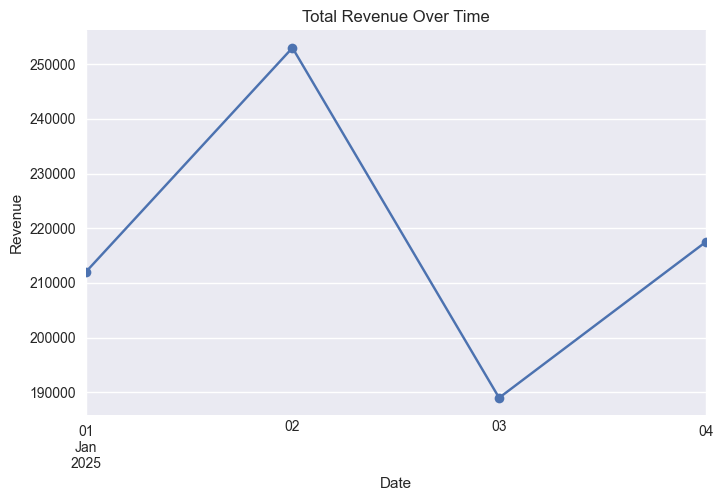

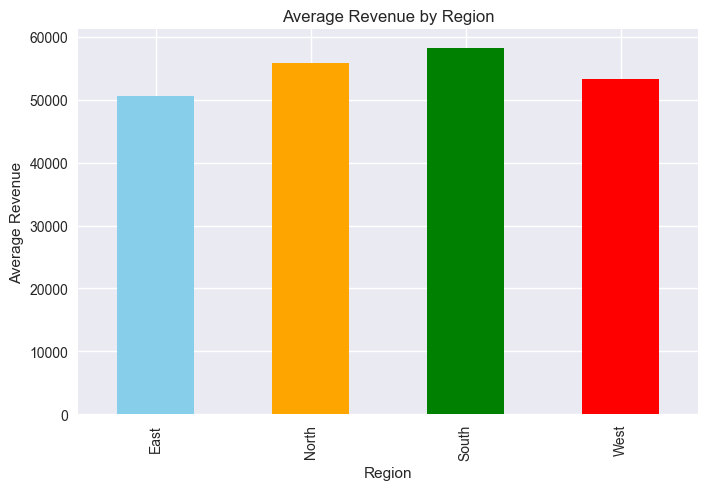

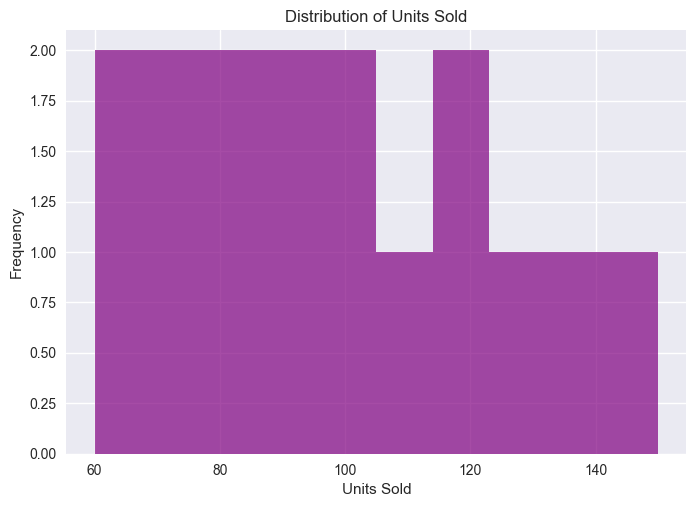

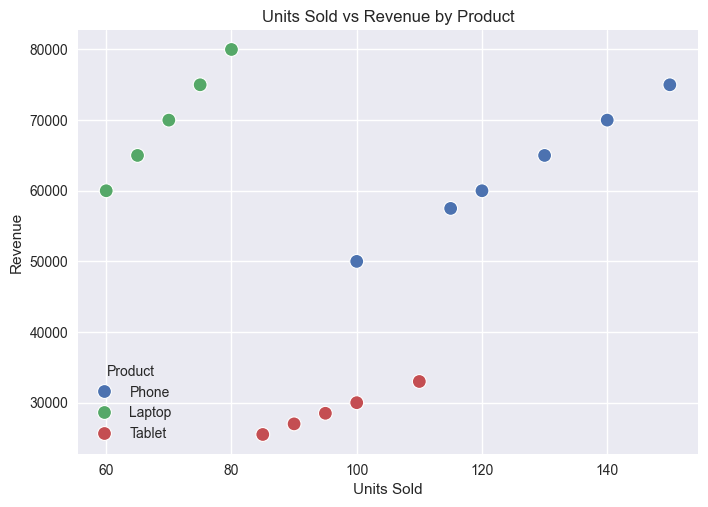

In [5]:

plt.style.use("seaborn-v0_8")

# 1. Line Chart: Revenue over time
df.groupby("Date")["Revenue"].sum().plot(marker="o", figsize=(8,5))
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# 2. Bar Chart: Average Revenue per Region
region_means["Revenue"].plot(kind="bar", color=["skyblue","orange","green","red"], figsize=(8,5))
plt.title("Average Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Average Revenue")
plt.show()

# 3. Histogram: Distribution of Units Sold
plt.hist(df["Units_Sold"], bins=10, color="purple", alpha=0.7)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Units Sold vs Revenue
sns.scatterplot(data=df, x="Units_Sold", y="Revenue", hue="Product", s=100)
plt.title("Units Sold vs Revenue by Product")
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.legend(title="Product")
plt.show()
